In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


In [3]:

df=pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data Exploration

In [5]:
# Explore the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# Finding null values
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
# Viewing the total unique values
df['CarName'].unique()


array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [8]:
# A function to fix the unstructured CarName columns
def clean_car_name(car_name):
    return car_name.split(" ")[0].lower()
    

In [15]:
# apply the clean_car_name function to the CarName columns
df_cleaned = df.copy()
df_cleaned['CarName'] = df_cleaned['CarName'].apply(clean_car_name)


In [16]:
# confirm the cleaned unique values after fixing
print(len(df_cleaned['CarName'].unique()))
print(df_cleaned['CarName'].unique())


27
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [17]:
# Fix the abbreviations  and  misspealed columns
df_cleaned['CarName'] = df_cleaned['CarName'].str.replace('vw', 'volkswagen')
df_cleaned['CarName'] = df_cleaned['CarName'].str.replace('vokswagen', 'volkswagen')
df_cleaned['CarName'] = df_cleaned['CarName'].str.replace('toyouta', 'toyota')
df_cleaned['CarName'] = df_cleaned['CarName'].str.replace('maxda', 'mazda')
df_cleaned['CarName'] = df_cleaned['CarName'].str.replace('porcshce', 'porsche')


In [18]:
# confirm the cleaned unique values after fixing abbreviations
print(len(df_cleaned['CarName'].unique()))
print(df_cleaned['CarName'].unique())


22
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


## Visualization

In [23]:

# Creating count plot function
def count_plot(column, data):
    plt.figure(figsize=(12, 4))
    sns.set(style="whitegrid")
    
    # Use a color palette
    palette = sns.color_palette("viridis", len(data[column].unique()))
    
    # Create the count plot
    ax = sns.countplot(data=data, x=column, palette=palette, order=data[column].value_counts().index)
    
    # Add annotations
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
                    textcoords='offset points')
    
    # Customize title and labels
    plt.title(f"Count Plot - {column}", fontsize=16, weight='bold')
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(fontsize=12)
    
    # Show the plot
    plt.show()


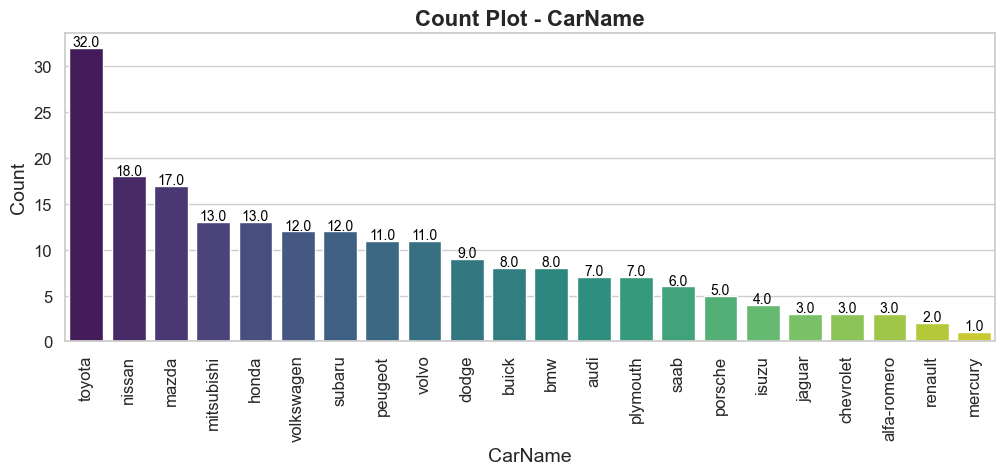

In [24]:
# Visualize the CarName column using the enhanced count_plot function
count_plot('CarName',df_cleaned)


In [25]:
# understanding distrbuton of fueltype
df_cleaned['fueltype'].value_counts().reset_index()


,index,fueltype
0,gas,185
1,diesel,20


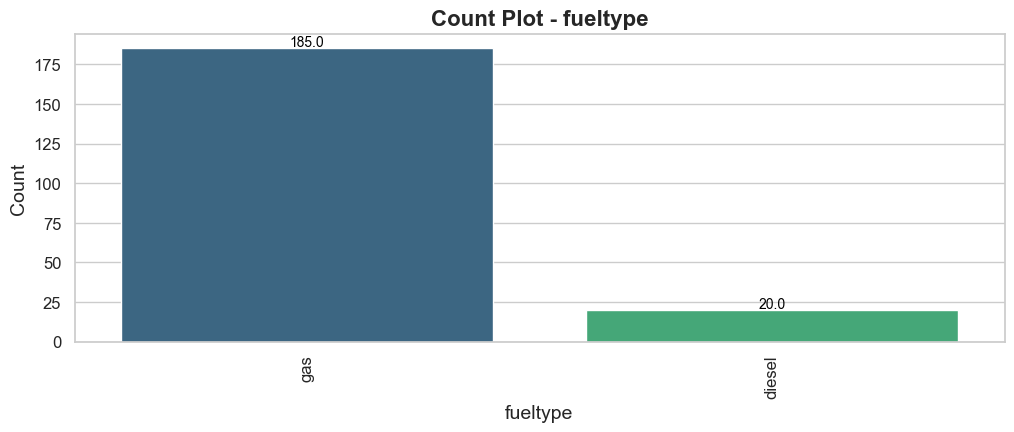

In [26]:
# visualize the fueltype Column using count_plot function
count_plot('fueltype', df_cleaned)


In [27]:
# understanding distrbuton of aspiration
df_cleaned['aspiration'].value_counts().reset_index()


,index,aspiration
0,std,168
1,turbo,37


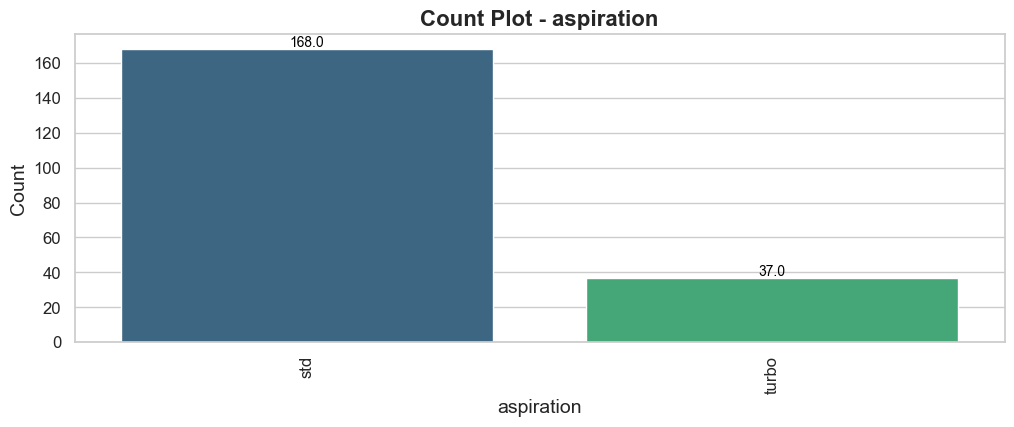

In [28]:
# visualize the aspiration Column using count_plot function
count_plot('aspiration', df_cleaned)


In [29]:
df_cleaned['doornumber'].value_counts().reset_index()


,index,doornumber
0,four,115
1,two,90


In [30]:
df_cleaned['carbody'].value_counts().reset_index()

,index,carbody
0,sedan,96
1,hatchback,70
2,wagon,25
3,hardtop,8
4,convertible,6


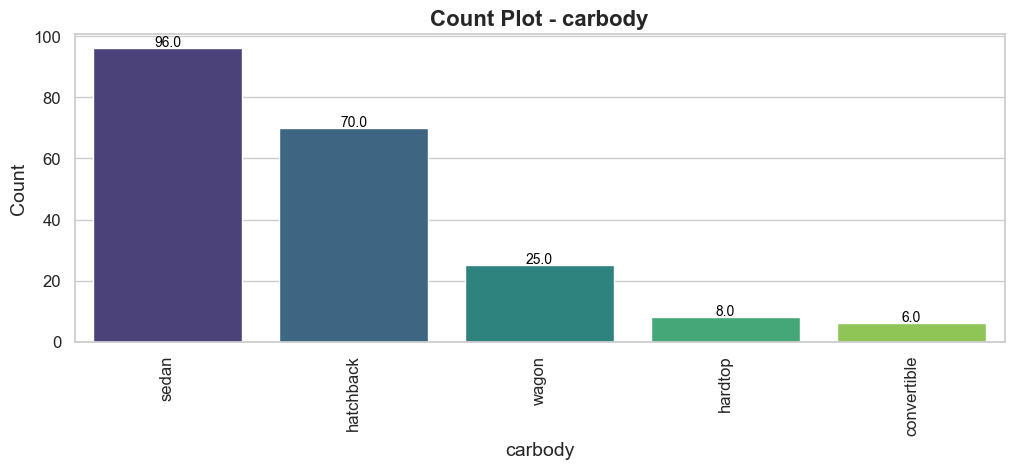

In [32]:
# visualize the carbody column using count_plot function
count_plot('carbody', df_cleaned)

In [34]:
df_cleaned['drivewheel'].value_counts().reset_index()

,index,drivewheel
0,fwd,120
1,rwd,76
2,4wd,9


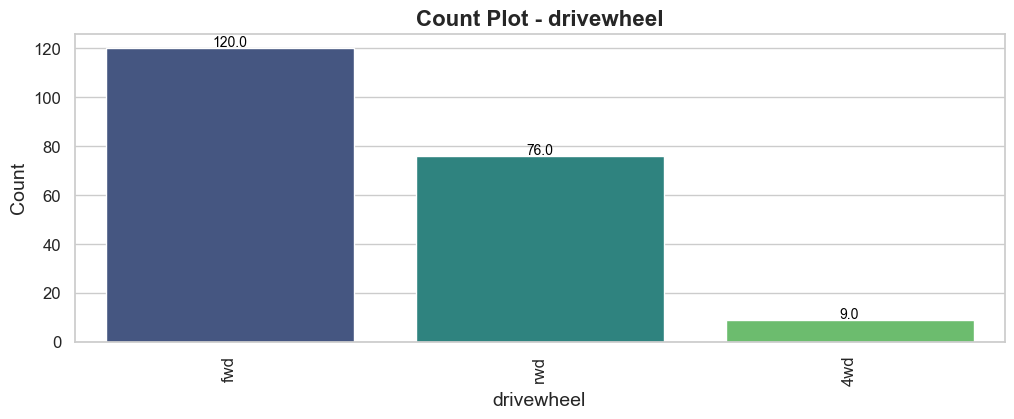

In [35]:
# visualize the drivewheel column using count_plot function
count_plot('drivewheel', df_cleaned)

In [36]:
df_cleaned['enginelocation'].value_counts().reset_index()

,index,enginelocation
0,front,202
1,rear,3


In [37]:
df_cleaned['enginetype'].value_counts().reset_index()


,index,enginetype
0,ohc,148
1,ohcf,15
2,ohcv,13
3,dohc,12
4,l,12
5,rotor,4
6,dohcv,1


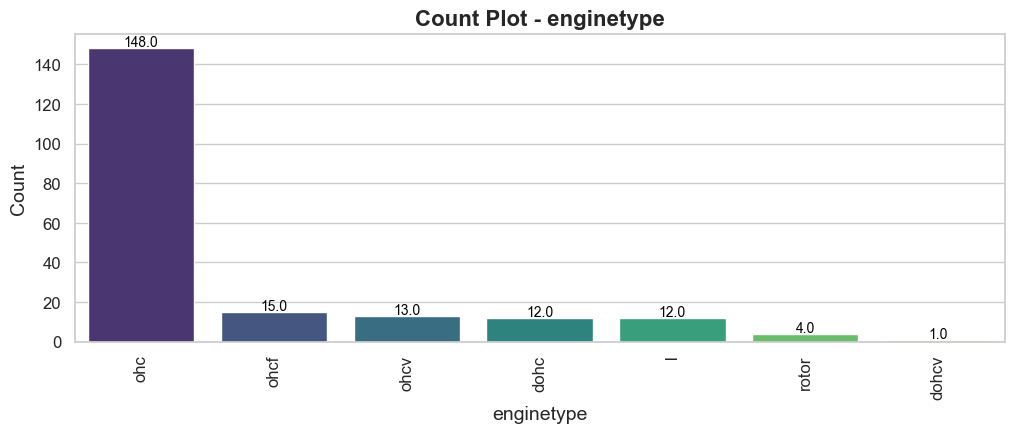

In [38]:
# visualize the enginetype column using the count_plot function
count_plot('enginetype', df_cleaned)

In [39]:
df_cleaned['cylindernumber'].value_counts().reset_index()

,index,cylindernumber
0,four,159
1,six,24
2,five,11
3,eight,5
4,two,4
5,three,1
6,twelve,1


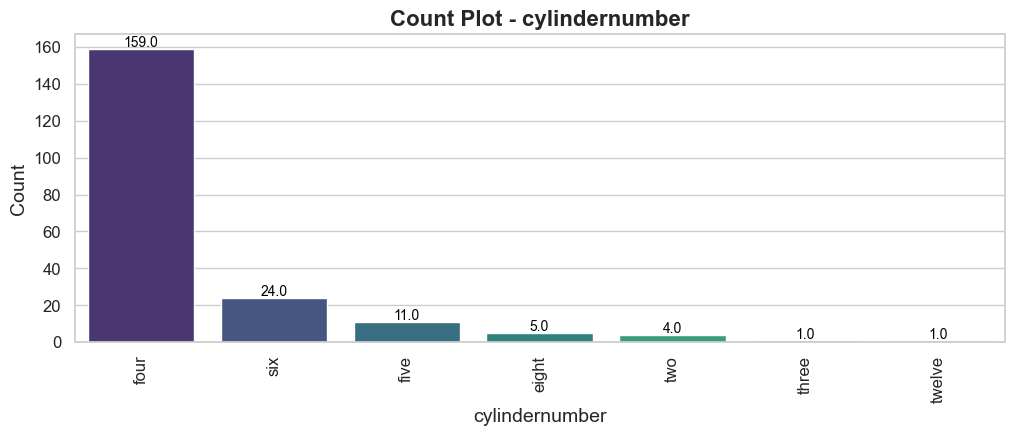

In [40]:
# visualize the cylindernumber column using count_plot function
count_plot('cylindernumber', df_cleaned)

In [41]:
df_cleaned['fuelsystem'].value_counts().reset_index()

,index,fuelsystem
0,mpfi,94
1,2bbl,66
2,idi,20
3,1bbl,11
4,spdi,9
5,4bbl,3
6,mfi,1
7,spfi,1


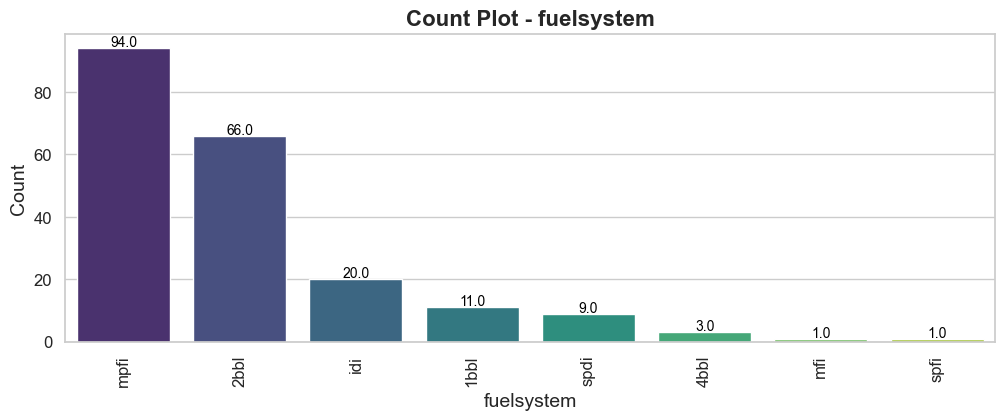

In [42]:
# visualize the fuelsystem column using count_plot function
count_plot('fuelsystem', df_cleaned)

In [43]:

# histogram function
def histogram(column_name, data):
    plt.figure(figsize=(12, 8))
    sns.set(style="whitegrid")
    
    # Use a color palette
    color = sns.color_palette("viridis", 1)[0]
    
    # Create the histogram with KDE
    ax = sns.histplot(data=data[column_name], bins=20, kde=True, color=color, edgecolor='black')
    
    # Calculate mean and median
    mean = data[column_name].mean()
    median = data[column_name].median()
    
    # Add mean and median lines
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2)
    plt.axvline(median, color='blue', linestyle='dashed', linewidth=2)
    
    # Add annotations for mean and median
    plt.text(mean, ax.get_ylim()[1] * 0.9, f'Mean: {mean:.2f}', color='red', fontsize=12, ha='center')
    plt.text(median, ax.get_ylim()[1] * 0.8, f'Median: {median:.2f}', color='blue', fontsize=12, ha='center')
    
    # Customize title and labels
    plt.title(f"{column_name} Distribution", fontsize=16, weight='bold')
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Show the plot
    plt.show()




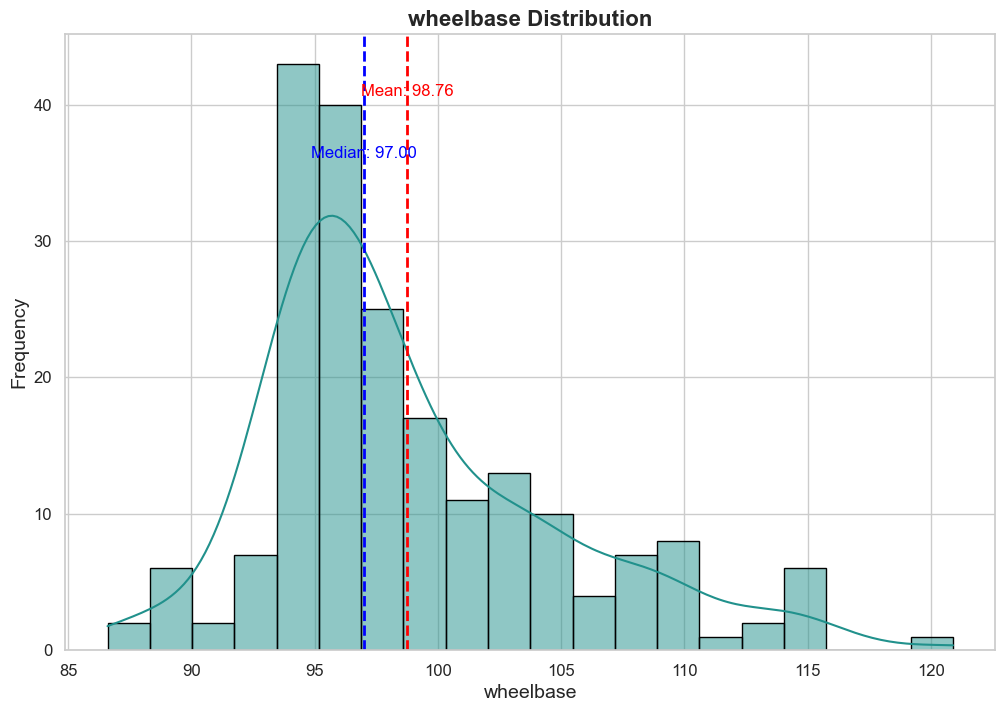

In [44]:
# Visualize the wheelbase column using the enhanced histogram function
histogram('wheelbase', df_cleaned)

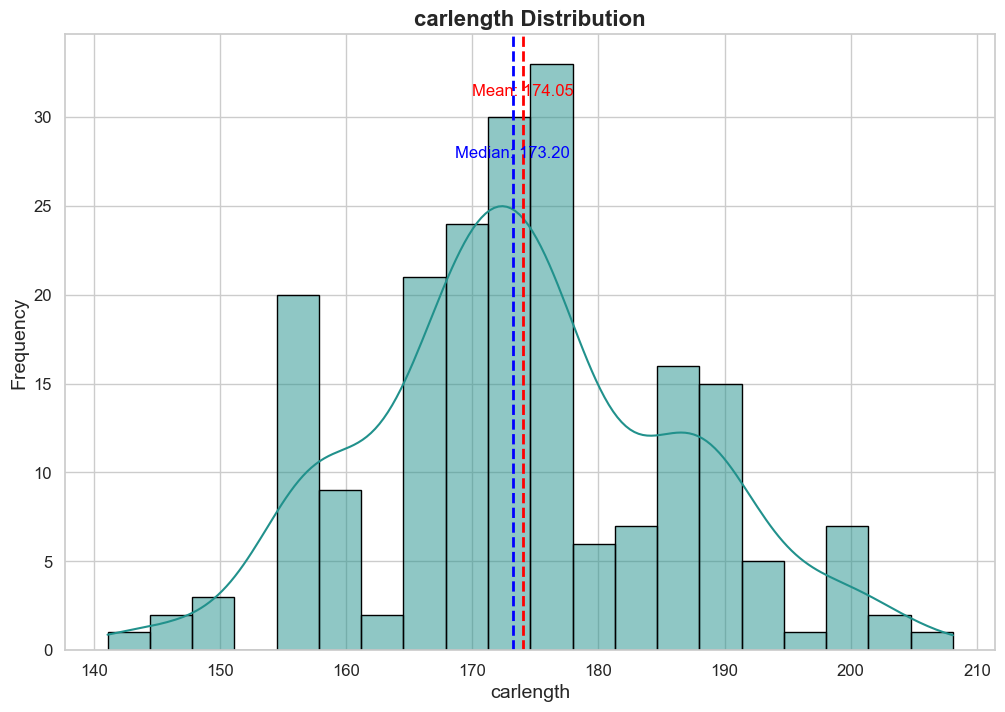

In [45]:
# visualize the carlength column using histogram function
histogram('carlength', df_cleaned)

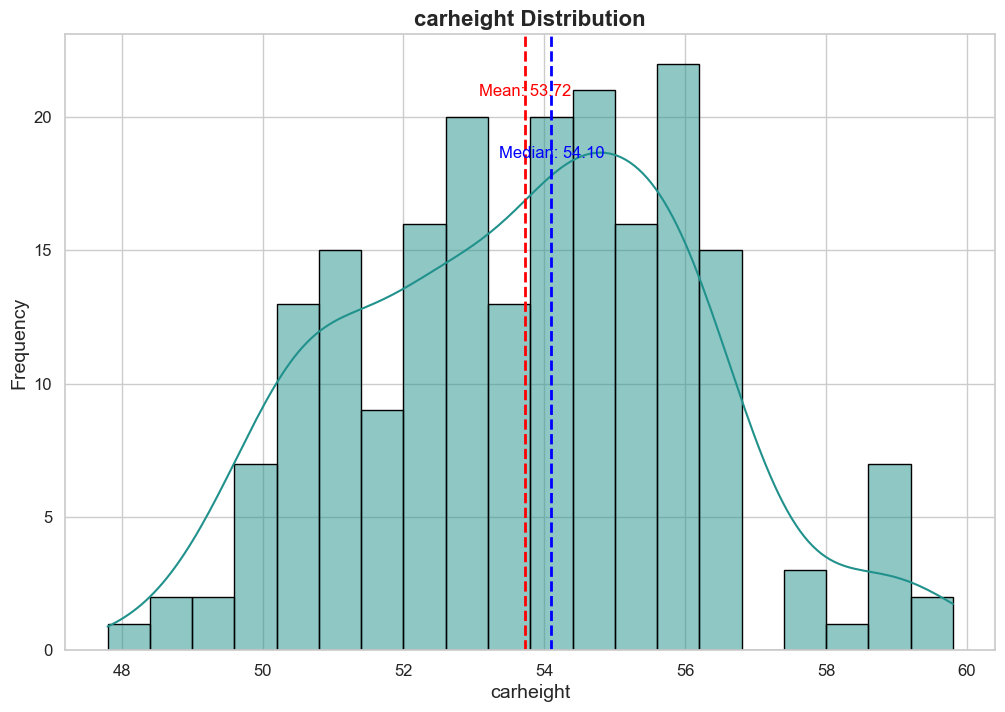

In [46]:
# visualize the carheight column using histogram function
histogram('carheight', df_cleaned)

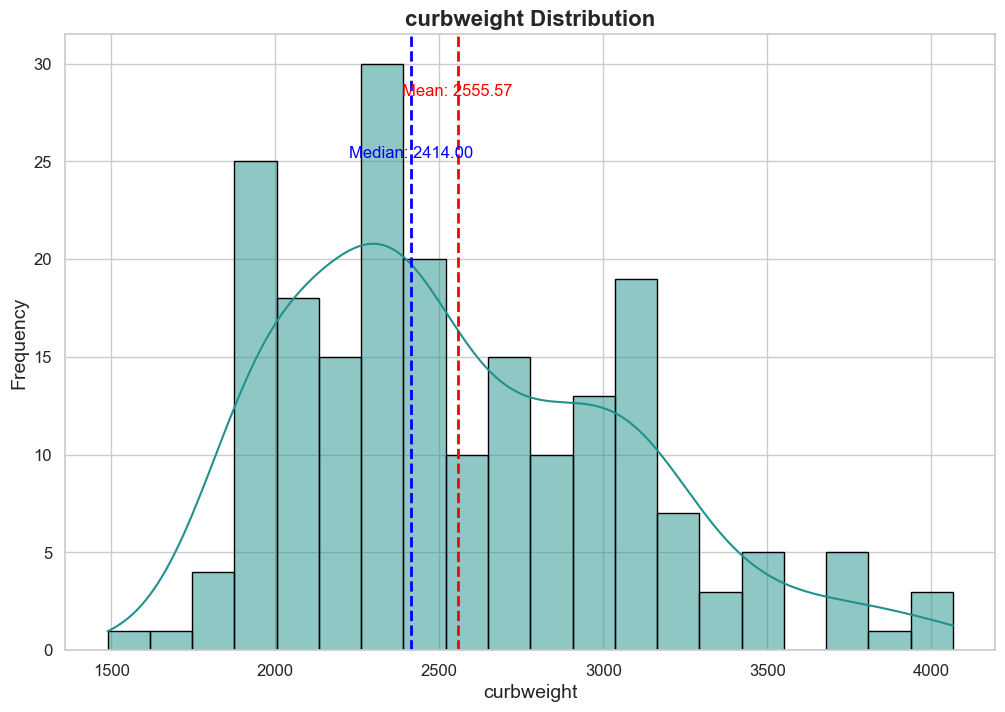

In [47]:
# visualize the curbweight column using histogram function
histogram('curbweight', df_cleaned)

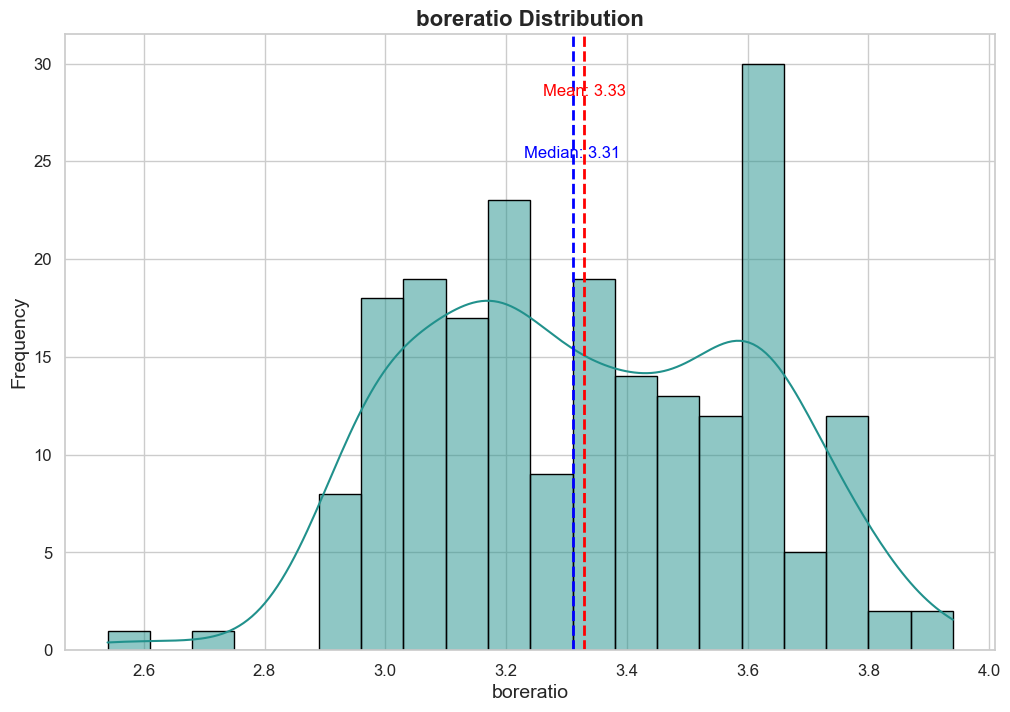

In [48]:
# visualize the boreratio column using histogram function
histogram('boreratio', df_cleaned)

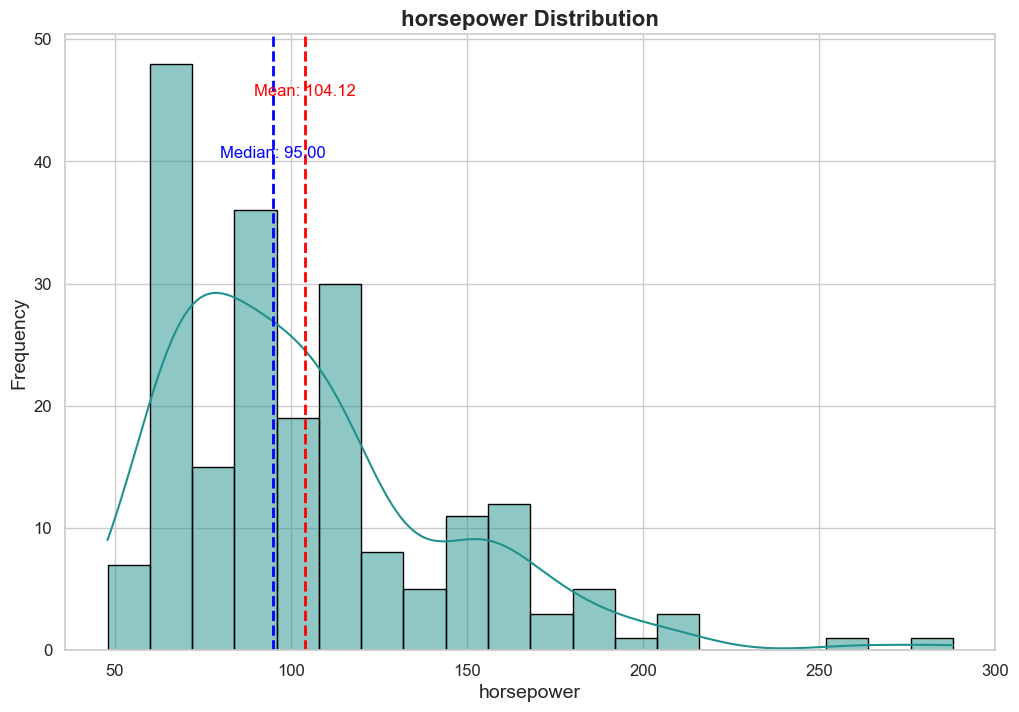

In [49]:
# visualize the horsepower column using histogram function
histogram('horsepower', df_cleaned)

In [50]:
# list each of Categorical and Numerical columns
categorical_columns = df_cleaned.select_dtypes(include=object).columns.tolist()
numerical_columns = df_cleaned.select_dtypes(exclude=object).columns.tolist()

### Relation between each numerical column and price column

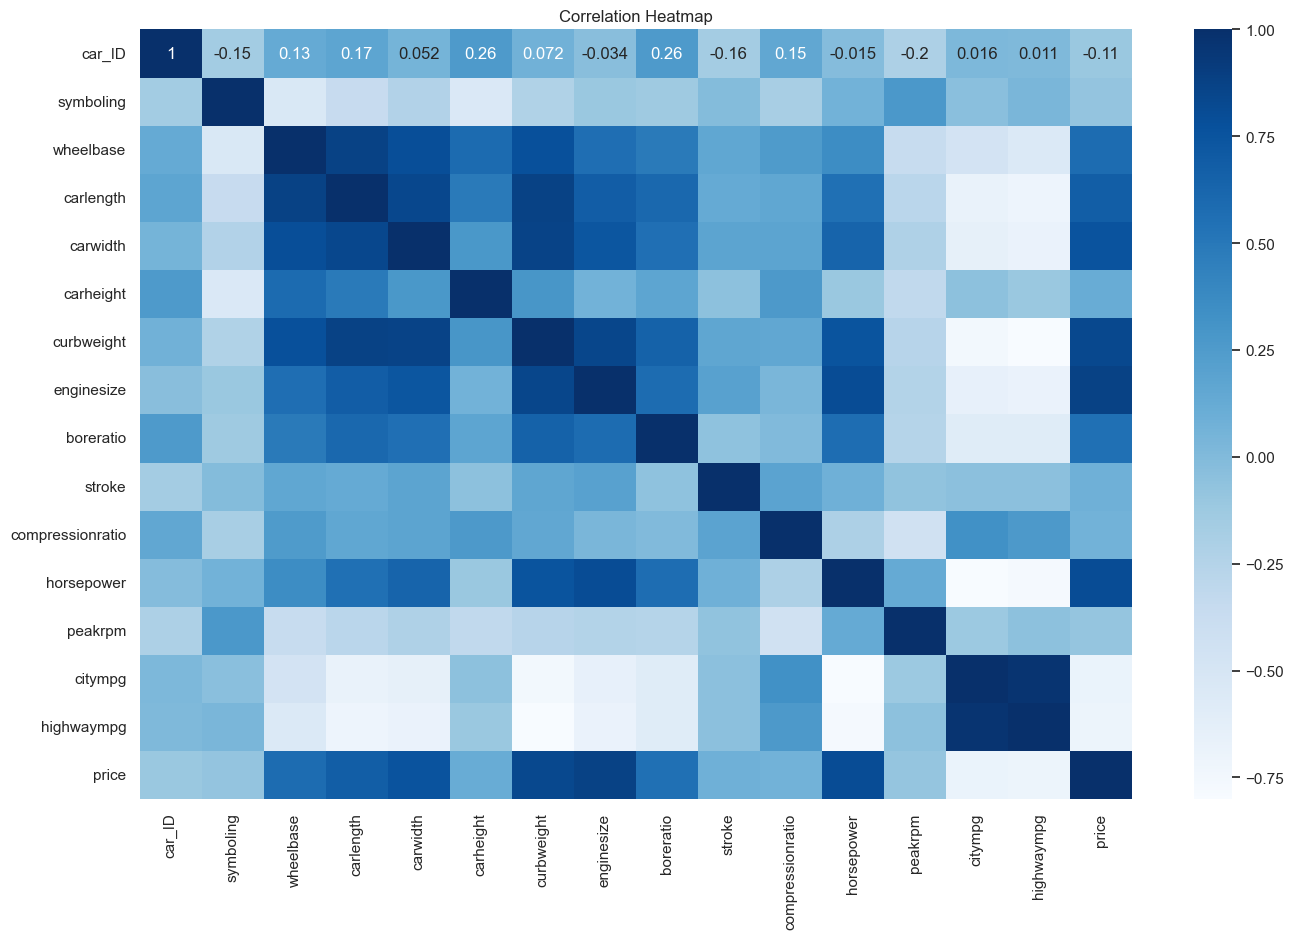

In [51]:
correlation_matrix = df_cleaned[numerical_columns].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


In [52]:
# list the dropped columns
dropped_columns = ['car_ID', 'symboling']

df_cleaned.drop(columns=dropped_columns, inplace=True)


In [53]:
numerical_columns.remove('car_ID')
numerical_columns.remove('symboling')


In [82]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report, roc_curve, auc
from sklearn.model_selection import learning_curve, cross_val_score


In [56]:
# use label encoder to encode the categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column])
    

In [57]:
# use scaler to scale the numerical columns
scaler = StandardScaler()
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])


In [58]:
X = df_cleaned.drop(['price', 'CarName'], axis=1) 
y = df_cleaned['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
# Build a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)


In [78]:
# Model train accuracy
train_r2 = rf_model.score(X_train, y_train)

# Model test accuracy
test_r2 = rf_model.score(X_test, y_test)

In [79]:
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred_test)
r2_square = r2_score(y_test, y_pred_test)


In [80]:
# Display results
print(f'Training R-squared: {train_r2}')
print(f'Testing R-squared: {test_r2}')
print(f'R-squared: {r2_square}')
print(f'Mean Squared Error: {mse}')


Training R-squared: 0.9848297194460353
Testing R-squared: 0.9590116601351563
R-squared: 0.9590116601351563
Mean Squared Error: 0.05094886079176


In [83]:
# Cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')


Cross-validation scores: [ 0.85449916  0.90280613 -1.49077768  0.90017424  0.6840787 ]
Mean cross-validation score: 0.37015610789822656


In [84]:
# Learning Curves
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


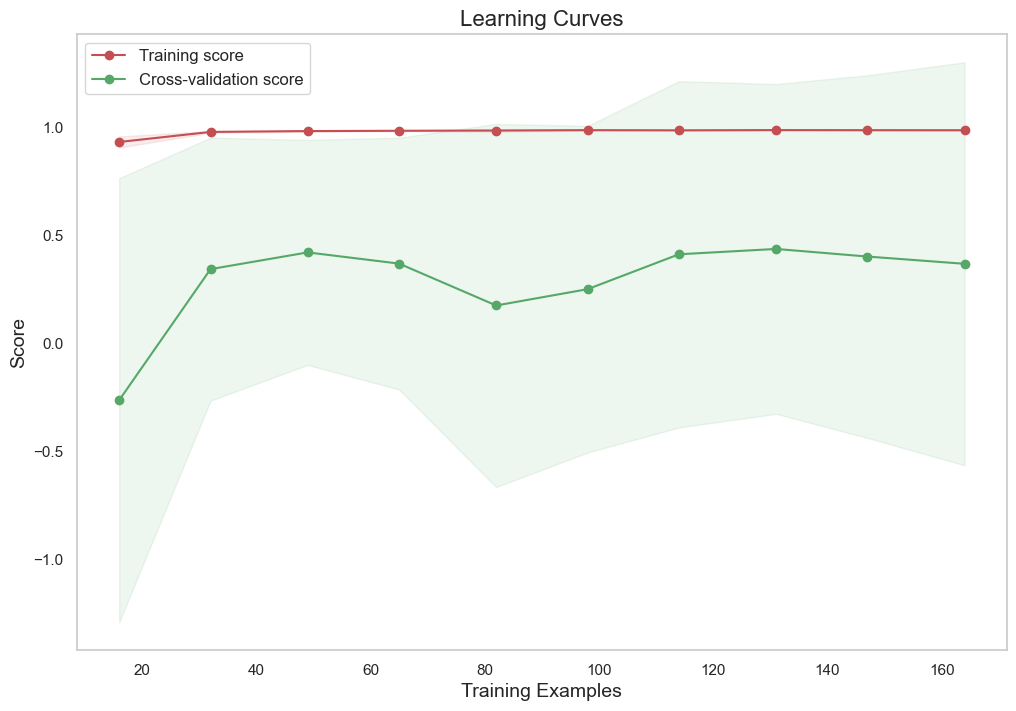

In [85]:
plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.title('Learning Curves', fontsize=16)
plt.xlabel('Training Examples', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid()
plt.show()


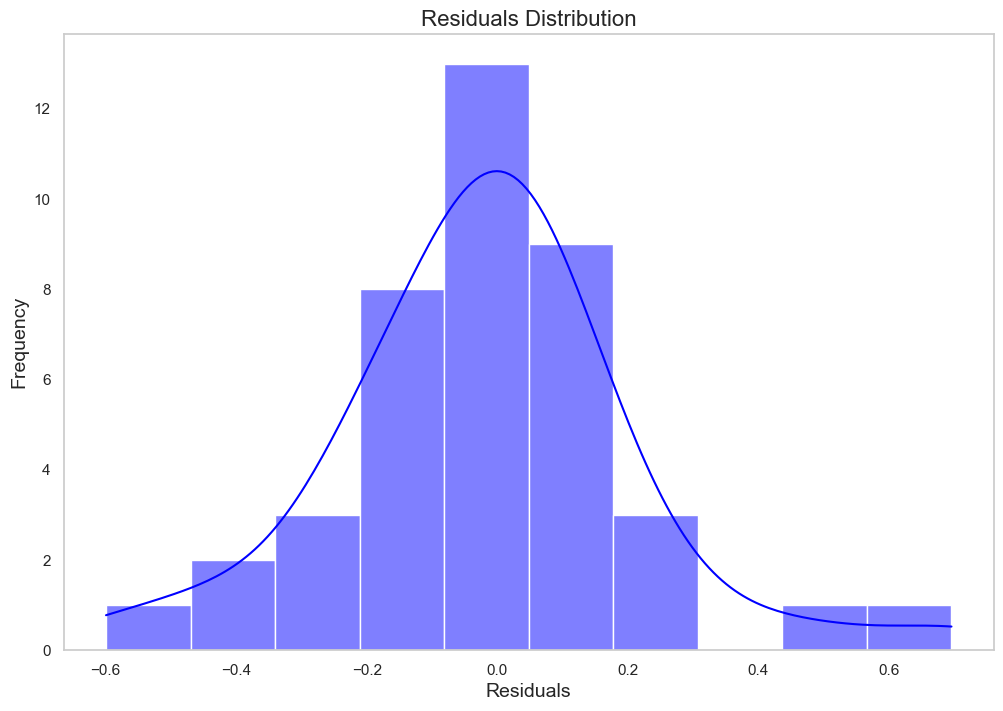

In [86]:
# Residual Plots
residuals = y_test - y_pred_test

plt.figure(figsize=(12, 8))
sns.histplot(residuals, kde=True, color='blue')
plt.title('Residuals Distribution', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.show()

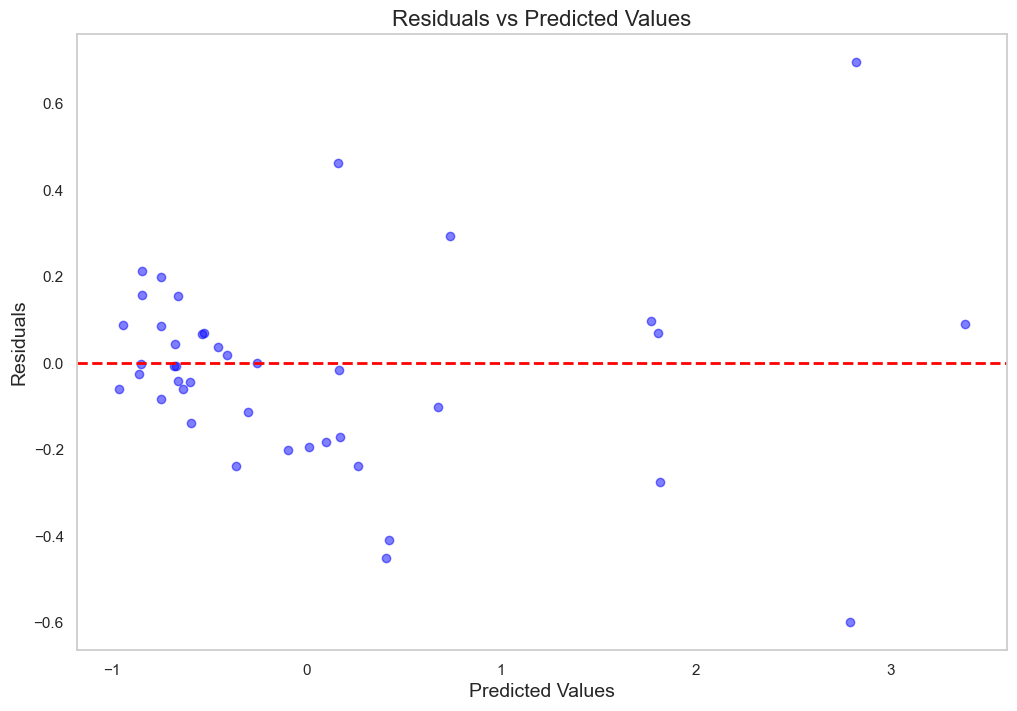

In [87]:
plt.figure(figsize=(12, 8))
plt.scatter(y_pred_test, residuals, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='dashed', linewidth=2)
plt.title('Residuals vs Predicted Values', fontsize=16)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid()
plt.show()